In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from torch.autograd import Variable

In [4]:
if torch.cuda.is_available():
   DEVICE = torch.device("cuda")
else:
   DEVICE = torch.device("cpu")

print(DEVICE)

cpu


In [5]:
torch.manual_seed(1)

In [6]:
# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='./data', 
                                           train=True, 
                                           transform=transforms.Compose([
                                           
                                                transforms.ToTensor(),
                                               
                                                ]),  
                                           download=True,
                                          )


test_dataset = torchvision.datasets.MNIST(root='./data', 
                                          train=False, 
                                          transform=transforms.Compose([
                                                
                                                transforms.ToTensor(),
                                          
                                                ])
                                         )

print("train_dataset size:", len(train_dataset),"\ntest_dataset size:", len(test_dataset))


train_dataset size: 60000 
test_dataset size: 10000


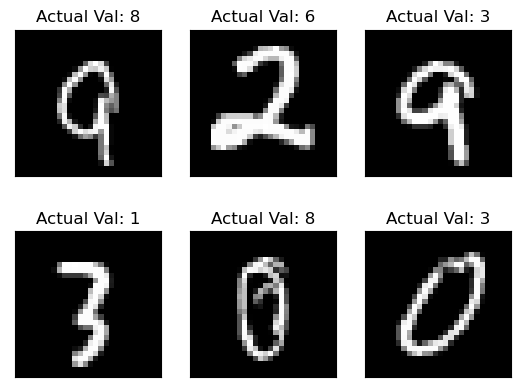

In [8]:
# Label Randomizer

randomLabel = torch.tensor(np.random.randint(0, 10, (len(train_dataset)),))
train_dataset.targets = randomLabel

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=100, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=100, 
                                          shuffle=False)

examples = iter(train_loader)
example_data, example_targets = examples.next()

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(example_data[i][0], cmap='gray')
    plt.title("Actual Val: {}".format(example_targets[i]))
    plt.xticks([])
    plt.yticks([])
plt.show()

In [11]:
class RMNIST(nn.Module):
    def __init__(self):
        super(RMNIST, self).__init__()
        
        self.fc1 = nn.Linear(784, 500)
        self.fc2 = nn.Linear(500, 10)
        

    def forward(self, x):

        # flatten as one dimension
        x = x.view(x.size()[0], -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

def train(model, optimizer, epoch, train_loader, interval):
    model.train()
    loss_fn = torch.nn.CrossEntropyLoss()
    n_correct = 0
    n_samples = 0
    for i, (data, target) in enumerate(train_loader):
        
        #if (i+1)%interval == 0 : print(i+1)  
        data, target = Variable(data), Variable(target)
        
        optimizer.zero_grad()

        # Forward propagation
        prediction = model(data)
        loss = loss_fn(prediction, target)
        
        #Backward propagation
        loss.backward()
        
        optimizer.step()

        _, predicted = torch.max(prediction.data, 1)
        n_samples += target.size(0)
        n_correct += (predicted == target).sum().item()
        acc = 100.0 * n_correct / n_samples
        
        
        if i % interval == 0:
            print (f'Train Log:Epoch: {epoch}, Step [{i+1}/{len(train_loader.dataset)}], TrainLoss: {loss.item():.4f}')
    return loss.data, round(acc,2)


Total no of parameters in Model 1: 397510
Train Log:Epoch: 1, Step [1/60000], TrainLoss: 2.3029
Train Log:Epoch: 1, Step [501/60000], TrainLoss: 2.2962
Accuracy of the network on the test images: 11.33% & Test Loss: 2.304582335948944
Train Log:Epoch: 2, Step [1/60000], TrainLoss: 2.3005
Train Log:Epoch: 2, Step [501/60000], TrainLoss: 2.3037
Accuracy of the network on the test images: 7.23% & Test Loss: 2.3129026532173156
Train Log:Epoch: 3, Step [1/60000], TrainLoss: 2.3010
Train Log:Epoch: 3, Step [501/60000], TrainLoss: 2.3048
Accuracy of the network on the test images: 7.23% & Test Loss: 2.3076931929588316
Train Log:Epoch: 4, Step [1/60000], TrainLoss: 2.3012
Train Log:Epoch: 4, Step [501/60000], TrainLoss: 2.2812
Accuracy of the network on the test images: 9.12% & Test Loss: 2.3149949502944946
Train Log:Epoch: 5, Step [1/60000], TrainLoss: 2.2848
Train Log:Epoch: 5, Step [501/60000], TrainLoss: 2.3001
Accuracy of the network on the test images: 8.85% & Test Loss: 2.318106093406677

Train Log:Epoch: 43, Step [501/60000], TrainLoss: 2.0337
Accuracy of the network on the test images: 9.96% & Test Loss: 2.430561037063599
Train Log:Epoch: 44, Step [1/60000], TrainLoss: 2.0398
Train Log:Epoch: 44, Step [501/60000], TrainLoss: 2.0676
Accuracy of the network on the test images: 10.19% & Test Loss: 2.4314888095855713
Train Log:Epoch: 45, Step [1/60000], TrainLoss: 2.0594
Train Log:Epoch: 45, Step [501/60000], TrainLoss: 2.0478
Accuracy of the network on the test images: 11.4% & Test Loss: 2.4013293862342833
Train Log:Epoch: 46, Step [1/60000], TrainLoss: 2.0356
Train Log:Epoch: 46, Step [501/60000], TrainLoss: 1.9623
Accuracy of the network on the test images: 10.22% & Test Loss: 2.4150201582908633
Train Log:Epoch: 47, Step [1/60000], TrainLoss: 2.0132
Train Log:Epoch: 47, Step [501/60000], TrainLoss: 1.9752
Accuracy of the network on the test images: 11.11% & Test Loss: 2.397792763710022
Train Log:Epoch: 48, Step [1/60000], TrainLoss: 2.0007
Train Log:Epoch: 48, Step [50

Accuracy of the network on the test images: 8.57% & Test Loss: 2.6599815320968627
Train Log:Epoch: 86, Step [1/60000], TrainLoss: 1.7152
Train Log:Epoch: 86, Step [501/60000], TrainLoss: 1.7391
Accuracy of the network on the test images: 9.83% & Test Loss: 2.6084947276115416
Train Log:Epoch: 87, Step [1/60000], TrainLoss: 1.7005
Train Log:Epoch: 87, Step [501/60000], TrainLoss: 1.7673
Accuracy of the network on the test images: 9.31% & Test Loss: 2.6183656787872316
Train Log:Epoch: 88, Step [1/60000], TrainLoss: 1.8199
Train Log:Epoch: 88, Step [501/60000], TrainLoss: 1.7121
Accuracy of the network on the test images: 9.71% & Test Loss: 2.6185829639434814
Train Log:Epoch: 89, Step [1/60000], TrainLoss: 1.6808
Train Log:Epoch: 89, Step [501/60000], TrainLoss: 1.8013
Accuracy of the network on the test images: 10.17% & Test Loss: 2.606937186717987
Train Log:Epoch: 90, Step [1/60000], TrainLoss: 1.7300
Train Log:Epoch: 90, Step [501/60000], TrainLoss: 1.7850
Accuracy of the network on the

Train Log:Epoch: 128, Step [501/60000], TrainLoss: 1.4691
Accuracy of the network on the test images: 9.35% & Test Loss: 2.8235613536834716
Train Log:Epoch: 129, Step [1/60000], TrainLoss: 1.5402
Train Log:Epoch: 129, Step [501/60000], TrainLoss: 1.5316
Accuracy of the network on the test images: 8.5% & Test Loss: 2.842068212032318
Train Log:Epoch: 130, Step [1/60000], TrainLoss: 1.5004
Train Log:Epoch: 130, Step [501/60000], TrainLoss: 1.4212
Accuracy of the network on the test images: 8.47% & Test Loss: 2.8843157744407653
Train Log:Epoch: 131, Step [1/60000], TrainLoss: 1.4438
Train Log:Epoch: 131, Step [501/60000], TrainLoss: 1.6253
Accuracy of the network on the test images: 10.14% & Test Loss: 2.844930214881897
Train Log:Epoch: 132, Step [1/60000], TrainLoss: 1.4808
Train Log:Epoch: 132, Step [501/60000], TrainLoss: 1.3688
Accuracy of the network on the test images: 9.53% & Test Loss: 2.817148449420929
Train Log:Epoch: 133, Step [1/60000], TrainLoss: 1.3329
Train Log:Epoch: 133, S

Train Log:Epoch: 170, Step [501/60000], TrainLoss: 1.3766
Accuracy of the network on the test images: 10.59% & Test Loss: 2.977134790420532
Train Log:Epoch: 171, Step [1/60000], TrainLoss: 1.1845
Train Log:Epoch: 171, Step [501/60000], TrainLoss: 1.3556
Accuracy of the network on the test images: 9.69% & Test Loss: 3.0185024309158326
Train Log:Epoch: 172, Step [1/60000], TrainLoss: 1.2853
Train Log:Epoch: 172, Step [501/60000], TrainLoss: 1.2006
Accuracy of the network on the test images: 9.88% & Test Loss: 3.0393850779533387
Train Log:Epoch: 173, Step [1/60000], TrainLoss: 1.2300
Train Log:Epoch: 173, Step [501/60000], TrainLoss: 1.2672
Accuracy of the network on the test images: 8.88% & Test Loss: 3.0855967807769775
Train Log:Epoch: 174, Step [1/60000], TrainLoss: 1.1959
Train Log:Epoch: 174, Step [501/60000], TrainLoss: 1.2906
Accuracy of the network on the test images: 9.73% & Test Loss: 3.025448181629181
Train Log:Epoch: 175, Step [1/60000], TrainLoss: 1.2265
Train Log:Epoch: 175,

Train Log:Epoch: 212, Step [501/60000], TrainLoss: 1.0167
Accuracy of the network on the test images: 9.83% & Test Loss: 3.3099150538444517
Train Log:Epoch: 213, Step [1/60000], TrainLoss: 1.1656
Train Log:Epoch: 213, Step [501/60000], TrainLoss: 1.0084
Accuracy of the network on the test images: 10.56% & Test Loss: 3.2326998138427734
Train Log:Epoch: 214, Step [1/60000], TrainLoss: 1.1080
Train Log:Epoch: 214, Step [501/60000], TrainLoss: 1.0601
Accuracy of the network on the test images: 9.88% & Test Loss: 3.2708983325958254
Train Log:Epoch: 215, Step [1/60000], TrainLoss: 1.1027
Train Log:Epoch: 215, Step [501/60000], TrainLoss: 1.1450
Accuracy of the network on the test images: 8.73% & Test Loss: 3.34746958732605
Train Log:Epoch: 216, Step [1/60000], TrainLoss: 1.1145
Train Log:Epoch: 216, Step [501/60000], TrainLoss: 1.1851
Accuracy of the network on the test images: 9.86% & Test Loss: 3.2757795333862303
Train Log:Epoch: 217, Step [1/60000], TrainLoss: 1.0057
Train Log:Epoch: 217,

Train Log:Epoch: 254, Step [501/60000], TrainLoss: 0.8764
Accuracy of the network on the test images: 9.56% & Test Loss: 3.5575601267814636
Train Log:Epoch: 255, Step [1/60000], TrainLoss: 1.0317
Train Log:Epoch: 255, Step [501/60000], TrainLoss: 0.9891
Accuracy of the network on the test images: 9.5% & Test Loss: 3.567106020450592
Train Log:Epoch: 256, Step [1/60000], TrainLoss: 1.0745
Train Log:Epoch: 256, Step [501/60000], TrainLoss: 0.9880
Accuracy of the network on the test images: 9.1% & Test Loss: 3.5951263427734377
Train Log:Epoch: 257, Step [1/60000], TrainLoss: 0.8233
Train Log:Epoch: 257, Step [501/60000], TrainLoss: 1.0259
Accuracy of the network on the test images: 9.77% & Test Loss: 3.571484000682831
Train Log:Epoch: 258, Step [1/60000], TrainLoss: 0.8983
Train Log:Epoch: 258, Step [501/60000], TrainLoss: 1.0162
Accuracy of the network on the test images: 10.52% & Test Loss: 3.5326392912864684
Train Log:Epoch: 259, Step [1/60000], TrainLoss: 1.0566
Train Log:Epoch: 259, S

Train Log:Epoch: 296, Step [501/60000], TrainLoss: 0.9835
Accuracy of the network on the test images: 10.0% & Test Loss: 3.750128586292267
Train Log:Epoch: 297, Step [1/60000], TrainLoss: 0.7011
Train Log:Epoch: 297, Step [501/60000], TrainLoss: 0.9485
Accuracy of the network on the test images: 9.91% & Test Loss: 3.8133256220817566
Train Log:Epoch: 298, Step [1/60000], TrainLoss: 0.8584
Train Log:Epoch: 298, Step [501/60000], TrainLoss: 0.9628
Accuracy of the network on the test images: 9.98% & Test Loss: 3.821127545833588
Train Log:Epoch: 299, Step [1/60000], TrainLoss: 0.7558
Train Log:Epoch: 299, Step [501/60000], TrainLoss: 0.8327
Accuracy of the network on the test images: 9.58% & Test Loss: 3.8715672302246094
Train Log:Epoch: 300, Step [1/60000], TrainLoss: 0.8267
Train Log:Epoch: 300, Step [501/60000], TrainLoss: 0.8960
Accuracy of the network on the test images: 9.67% & Test Loss: 3.8376182985305785
Train Log:Epoch: 301, Step [1/60000], TrainLoss: 0.6721
Train Log:Epoch: 301, 

Train Log:Epoch: 338, Step [501/60000], TrainLoss: 0.8107
Accuracy of the network on the test images: 10.51% & Test Loss: 4.038969264030457
Train Log:Epoch: 339, Step [1/60000], TrainLoss: 0.7739
Train Log:Epoch: 339, Step [501/60000], TrainLoss: 0.9807
Accuracy of the network on the test images: 10.63% & Test Loss: 4.093995585441589
Train Log:Epoch: 340, Step [1/60000], TrainLoss: 0.5233
Train Log:Epoch: 340, Step [501/60000], TrainLoss: 0.7104
Accuracy of the network on the test images: 9.84% & Test Loss: 4.102833995819092
Train Log:Epoch: 341, Step [1/60000], TrainLoss: 0.6081
Train Log:Epoch: 341, Step [501/60000], TrainLoss: 0.7407
Accuracy of the network on the test images: 10.37% & Test Loss: 4.030303955078125
Train Log:Epoch: 342, Step [1/60000], TrainLoss: 0.6216
Train Log:Epoch: 342, Step [501/60000], TrainLoss: 0.7680
Accuracy of the network on the test images: 10.23% & Test Loss: 4.123080172538757
Train Log:Epoch: 343, Step [1/60000], TrainLoss: 0.7549
Train Log:Epoch: 343,

Train Log:Epoch: 380, Step [501/60000], TrainLoss: 0.8105
Accuracy of the network on the test images: 9.74% & Test Loss: 4.42315310716629
Train Log:Epoch: 381, Step [1/60000], TrainLoss: 0.5211
Train Log:Epoch: 381, Step [501/60000], TrainLoss: 0.6658
Accuracy of the network on the test images: 9.78% & Test Loss: 4.434303731918335
Train Log:Epoch: 382, Step [1/60000], TrainLoss: 0.6176
Train Log:Epoch: 382, Step [501/60000], TrainLoss: 0.6238
Accuracy of the network on the test images: 9.33% & Test Loss: 4.542010660171509
Train Log:Epoch: 383, Step [1/60000], TrainLoss: 0.6023
Train Log:Epoch: 383, Step [501/60000], TrainLoss: 0.5665
Accuracy of the network on the test images: 9.48% & Test Loss: 4.451009700298309
Train Log:Epoch: 384, Step [1/60000], TrainLoss: 0.6644
Train Log:Epoch: 384, Step [501/60000], TrainLoss: 0.5061
Accuracy of the network on the test images: 9.29% & Test Loss: 4.50410029888153
Train Log:Epoch: 385, Step [1/60000], TrainLoss: 0.8052
Train Log:Epoch: 385, Step 

Train Log:Epoch: 422, Step [501/60000], TrainLoss: 0.5269
Accuracy of the network on the test images: 10.37% & Test Loss: 4.724087400436401
Train Log:Epoch: 423, Step [1/60000], TrainLoss: 0.4176
Train Log:Epoch: 423, Step [501/60000], TrainLoss: 0.6349
Accuracy of the network on the test images: 9.23% & Test Loss: 4.858875365257263
Train Log:Epoch: 424, Step [1/60000], TrainLoss: 0.5236
Train Log:Epoch: 424, Step [501/60000], TrainLoss: 0.5830
Accuracy of the network on the test images: 10.24% & Test Loss: 4.703890392780304
Train Log:Epoch: 425, Step [1/60000], TrainLoss: 0.6338
Train Log:Epoch: 425, Step [501/60000], TrainLoss: 0.6179
Accuracy of the network on the test images: 10.09% & Test Loss: 4.717463419437409
Train Log:Epoch: 426, Step [1/60000], TrainLoss: 0.6263
Train Log:Epoch: 426, Step [501/60000], TrainLoss: 0.5507
Accuracy of the network on the test images: 10.0% & Test Loss: 4.775345442295074
Train Log:Epoch: 427, Step [1/60000], TrainLoss: 0.3821
Train Log:Epoch: 427, 

Train Log:Epoch: 464, Step [501/60000], TrainLoss: 0.6079
Accuracy of the network on the test images: 9.48% & Test Loss: 5.161901569366455
Train Log:Epoch: 465, Step [1/60000], TrainLoss: 0.4338
Train Log:Epoch: 465, Step [501/60000], TrainLoss: 0.4574
Accuracy of the network on the test images: 10.23% & Test Loss: 5.035534234046936
Train Log:Epoch: 466, Step [1/60000], TrainLoss: 0.4567
Train Log:Epoch: 466, Step [501/60000], TrainLoss: 0.4848
Accuracy of the network on the test images: 10.26% & Test Loss: 5.072595031261444
Train Log:Epoch: 467, Step [1/60000], TrainLoss: 0.4953
Train Log:Epoch: 467, Step [501/60000], TrainLoss: 0.4394
Accuracy of the network on the test images: 10.0% & Test Loss: 5.0902323818206785
Train Log:Epoch: 468, Step [1/60000], TrainLoss: 0.4495
Train Log:Epoch: 468, Step [501/60000], TrainLoss: 0.5824
Accuracy of the network on the test images: 10.02% & Test Loss: 5.126263508796692
Train Log:Epoch: 469, Step [1/60000], TrainLoss: 0.4941
Train Log:Epoch: 469,

Train Log:Epoch: 506, Step [501/60000], TrainLoss: 0.5225
Accuracy of the network on the test images: 9.97% & Test Loss: 5.4550964593887326
Train Log:Epoch: 507, Step [1/60000], TrainLoss: 0.2998
Train Log:Epoch: 507, Step [501/60000], TrainLoss: 0.3680
Accuracy of the network on the test images: 10.0% & Test Loss: 5.481055088043213
Train Log:Epoch: 508, Step [1/60000], TrainLoss: 0.3917
Train Log:Epoch: 508, Step [501/60000], TrainLoss: 0.3610
Accuracy of the network on the test images: 10.02% & Test Loss: 5.469902935028077
Train Log:Epoch: 509, Step [1/60000], TrainLoss: 0.4747
Train Log:Epoch: 509, Step [501/60000], TrainLoss: 0.4005
Accuracy of the network on the test images: 10.54% & Test Loss: 5.393269758224488
Train Log:Epoch: 510, Step [1/60000], TrainLoss: 0.4340
Train Log:Epoch: 510, Step [501/60000], TrainLoss: 0.3904
Accuracy of the network on the test images: 9.42% & Test Loss: 5.594430303573608
Train Log:Epoch: 511, Step [1/60000], TrainLoss: 0.3872
Train Log:Epoch: 511, 

Train Log:Epoch: 548, Step [501/60000], TrainLoss: 0.3094
Accuracy of the network on the test images: 9.58% & Test Loss: 5.869896950721741
Train Log:Epoch: 549, Step [1/60000], TrainLoss: 0.3920
Train Log:Epoch: 549, Step [501/60000], TrainLoss: 0.3289
Accuracy of the network on the test images: 10.02% & Test Loss: 5.7953976011276245
Train Log:Epoch: 550, Step [1/60000], TrainLoss: 0.2700
Train Log:Epoch: 550, Step [501/60000], TrainLoss: 0.3809
Accuracy of the network on the test images: 9.85% & Test Loss: 5.876992993354797
Train Log:Epoch: 551, Step [1/60000], TrainLoss: 0.2402
Train Log:Epoch: 551, Step [501/60000], TrainLoss: 0.4121
Accuracy of the network on the test images: 9.71% & Test Loss: 5.938343267440796
Train Log:Epoch: 552, Step [1/60000], TrainLoss: 0.3073
Train Log:Epoch: 552, Step [501/60000], TrainLoss: 0.4065
Accuracy of the network on the test images: 10.08% & Test Loss: 5.837510776519776
Train Log:Epoch: 553, Step [1/60000], TrainLoss: 0.3927
Train Log:Epoch: 553, 

Train Log:Epoch: 590, Step [501/60000], TrainLoss: 0.3112
Accuracy of the network on the test images: 9.54% & Test Loss: 6.24309962272644
Train Log:Epoch: 591, Step [1/60000], TrainLoss: 0.2680
Train Log:Epoch: 591, Step [501/60000], TrainLoss: 0.3274
Accuracy of the network on the test images: 10.37% & Test Loss: 6.1700851392745975
Train Log:Epoch: 592, Step [1/60000], TrainLoss: 0.3769
Train Log:Epoch: 592, Step [501/60000], TrainLoss: 0.3121
Accuracy of the network on the test images: 9.88% & Test Loss: 6.267898197174072
Train Log:Epoch: 593, Step [1/60000], TrainLoss: 0.4023
Train Log:Epoch: 593, Step [501/60000], TrainLoss: 0.2477
Accuracy of the network on the test images: 9.45% & Test Loss: 6.328383407592773
Train Log:Epoch: 594, Step [1/60000], TrainLoss: 0.3523
Train Log:Epoch: 594, Step [501/60000], TrainLoss: 0.2224
Accuracy of the network on the test images: 9.46% & Test Loss: 6.271703548431397
Train Log:Epoch: 595, Step [1/60000], TrainLoss: 0.2992
Train Log:Epoch: 595, St

Train Log:Epoch: 632, Step [501/60000], TrainLoss: 0.2619
Accuracy of the network on the test images: 10.13% & Test Loss: 6.604260334968567
Train Log:Epoch: 633, Step [1/60000], TrainLoss: 0.2559
Train Log:Epoch: 633, Step [501/60000], TrainLoss: 0.2567
Accuracy of the network on the test images: 9.5% & Test Loss: 6.703884000778198
Train Log:Epoch: 634, Step [1/60000], TrainLoss: 0.2089
Train Log:Epoch: 634, Step [501/60000], TrainLoss: 0.2348
Accuracy of the network on the test images: 9.67% & Test Loss: 6.688716974258423
Train Log:Epoch: 635, Step [1/60000], TrainLoss: 0.3052
Train Log:Epoch: 635, Step [501/60000], TrainLoss: 0.2123
Accuracy of the network on the test images: 9.96% & Test Loss: 6.677317996025085
Train Log:Epoch: 636, Step [1/60000], TrainLoss: 0.2738
Train Log:Epoch: 636, Step [501/60000], TrainLoss: 0.2595
Accuracy of the network on the test images: 10.09% & Test Loss: 6.623873476982117
Train Log:Epoch: 637, Step [1/60000], TrainLoss: 0.2086
Train Log:Epoch: 637, St

Train Log:Epoch: 674, Step [501/60000], TrainLoss: 0.2620
Accuracy of the network on the test images: 9.77% & Test Loss: 7.1234686040878294
Train Log:Epoch: 675, Step [1/60000], TrainLoss: 0.2209
Train Log:Epoch: 675, Step [501/60000], TrainLoss: 0.2439
Accuracy of the network on the test images: 9.54% & Test Loss: 7.143055863380432
Train Log:Epoch: 676, Step [1/60000], TrainLoss: 0.2188
Train Log:Epoch: 676, Step [501/60000], TrainLoss: 0.1495
Accuracy of the network on the test images: 9.54% & Test Loss: 7.147323536872864
Train Log:Epoch: 677, Step [1/60000], TrainLoss: 0.2139
Train Log:Epoch: 677, Step [501/60000], TrainLoss: 0.2923
Accuracy of the network on the test images: 10.03% & Test Loss: 7.084640035629272
Train Log:Epoch: 678, Step [1/60000], TrainLoss: 0.1895
Train Log:Epoch: 678, Step [501/60000], TrainLoss: 0.2292
Accuracy of the network on the test images: 10.0% & Test Loss: 7.126249008178711
Train Log:Epoch: 679, Step [1/60000], TrainLoss: 0.2369
Train Log:Epoch: 679, S

Train Log:Epoch: 716, Step [501/60000], TrainLoss: 0.1942
Accuracy of the network on the test images: 10.22% & Test Loss: 7.410567679405212
Train Log:Epoch: 717, Step [1/60000], TrainLoss: 0.2465
Train Log:Epoch: 717, Step [501/60000], TrainLoss: 0.1451
Accuracy of the network on the test images: 10.19% & Test Loss: 7.504794158935547
Train Log:Epoch: 718, Step [1/60000], TrainLoss: 0.1815
Train Log:Epoch: 718, Step [501/60000], TrainLoss: 0.2704
Accuracy of the network on the test images: 10.47% & Test Loss: 7.459385538101197
Train Log:Epoch: 719, Step [1/60000], TrainLoss: 0.2206
Train Log:Epoch: 719, Step [501/60000], TrainLoss: 0.2474
Accuracy of the network on the test images: 9.94% & Test Loss: 7.494431538581848
Train Log:Epoch: 720, Step [1/60000], TrainLoss: 0.1525
Train Log:Epoch: 720, Step [501/60000], TrainLoss: 0.1641
Accuracy of the network on the test images: 9.98% & Test Loss: 7.5107749605178835
Train Log:Epoch: 721, Step [1/60000], TrainLoss: 0.1338
Train Log:Epoch: 721,

Train Log:Epoch: 758, Step [501/60000], TrainLoss: 0.1302
Accuracy of the network on the test images: 10.11% & Test Loss: 7.951034135818482
Train Log:Epoch: 759, Step [1/60000], TrainLoss: 0.1414
Train Log:Epoch: 759, Step [501/60000], TrainLoss: 0.1900
Accuracy of the network on the test images: 9.71% & Test Loss: 7.9494197559356685
Train Log:Epoch: 760, Step [1/60000], TrainLoss: 0.1147
Train Log:Epoch: 760, Step [501/60000], TrainLoss: 0.1924
Accuracy of the network on the test images: 9.99% & Test Loss: 7.998318972587586
Train Log:Epoch: 761, Step [1/60000], TrainLoss: 0.2305
Train Log:Epoch: 761, Step [501/60000], TrainLoss: 0.1888
Accuracy of the network on the test images: 10.1% & Test Loss: 7.953726401329041
Train Log:Epoch: 762, Step [1/60000], TrainLoss: 0.2624
Train Log:Epoch: 762, Step [501/60000], TrainLoss: 0.1167
Accuracy of the network on the test images: 9.94% & Test Loss: 7.962055587768555
Train Log:Epoch: 763, Step [1/60000], TrainLoss: 0.1481
Train Log:Epoch: 763, S

Train Log:Epoch: 800, Step [501/60000], TrainLoss: 0.1607
Accuracy of the network on the test images: 10.48% & Test Loss: 8.308332571983337
Train Log:Epoch: 801, Step [1/60000], TrainLoss: 0.0895
Train Log:Epoch: 801, Step [501/60000], TrainLoss: 0.0880
Accuracy of the network on the test images: 10.27% & Test Loss: 8.359162282943725
Train Log:Epoch: 802, Step [1/60000], TrainLoss: 0.1494
Train Log:Epoch: 802, Step [501/60000], TrainLoss: 0.1724
Accuracy of the network on the test images: 10.34% & Test Loss: 8.354205632209778
Train Log:Epoch: 803, Step [1/60000], TrainLoss: 0.1617
Train Log:Epoch: 803, Step [501/60000], TrainLoss: 0.1607
Accuracy of the network on the test images: 10.07% & Test Loss: 8.389958786964417
Train Log:Epoch: 804, Step [1/60000], TrainLoss: 0.0964
Train Log:Epoch: 804, Step [501/60000], TrainLoss: 0.1731
Accuracy of the network on the test images: 10.17% & Test Loss: 8.344699997901916
Train Log:Epoch: 805, Step [1/60000], TrainLoss: 0.0788
Train Log:Epoch: 805

Train Log:Epoch: 842, Step [501/60000], TrainLoss: 0.1945
Accuracy of the network on the test images: 9.76% & Test Loss: 8.840560007095338
Train Log:Epoch: 843, Step [1/60000], TrainLoss: 0.1068
Train Log:Epoch: 843, Step [501/60000], TrainLoss: 0.1452
Accuracy of the network on the test images: 9.85% & Test Loss: 8.894197907447815
Train Log:Epoch: 844, Step [1/60000], TrainLoss: 0.1108
Train Log:Epoch: 844, Step [501/60000], TrainLoss: 0.1161
Accuracy of the network on the test images: 10.07% & Test Loss: 8.82693362236023
Train Log:Epoch: 845, Step [1/60000], TrainLoss: 0.1156
Train Log:Epoch: 845, Step [501/60000], TrainLoss: 0.1880
Accuracy of the network on the test images: 10.15% & Test Loss: 8.816748180389403
Train Log:Epoch: 846, Step [1/60000], TrainLoss: 0.1154
Train Log:Epoch: 846, Step [501/60000], TrainLoss: 0.1136
Accuracy of the network on the test images: 9.85% & Test Loss: 8.851919183731079
Train Log:Epoch: 847, Step [1/60000], TrainLoss: 0.0713
Train Log:Epoch: 847, St

Train Log:Epoch: 884, Step [501/60000], TrainLoss: 0.0842
Accuracy of the network on the test images: 10.05% & Test Loss: 9.314691047668457
Train Log:Epoch: 885, Step [1/60000], TrainLoss: 0.0833
Train Log:Epoch: 885, Step [501/60000], TrainLoss: 0.1172
Accuracy of the network on the test images: 9.75% & Test Loss: 9.36951515674591
Train Log:Epoch: 886, Step [1/60000], TrainLoss: 0.0832
Train Log:Epoch: 886, Step [501/60000], TrainLoss: 0.1072
Accuracy of the network on the test images: 9.7% & Test Loss: 9.392275776863098
Train Log:Epoch: 887, Step [1/60000], TrainLoss: 0.1202
Train Log:Epoch: 887, Step [501/60000], TrainLoss: 0.1119
Accuracy of the network on the test images: 9.76% & Test Loss: 9.35585346698761
Train Log:Epoch: 888, Step [1/60000], TrainLoss: 0.0970
Train Log:Epoch: 888, Step [501/60000], TrainLoss: 0.0764
Accuracy of the network on the test images: 9.93% & Test Loss: 9.355043749809266
Train Log:Epoch: 889, Step [1/60000], TrainLoss: 0.0996
Train Log:Epoch: 889, Step 

Accuracy of the network on the test images: 9.75% & Test Loss: 9.765705924034119
Train Log:Epoch: 927, Step [1/60000], TrainLoss: 0.0982
Train Log:Epoch: 927, Step [501/60000], TrainLoss: 0.1010
Accuracy of the network on the test images: 9.86% & Test Loss: 9.788020811080933
Train Log:Epoch: 928, Step [1/60000], TrainLoss: 0.0933
Train Log:Epoch: 928, Step [501/60000], TrainLoss: 0.0692
Accuracy of the network on the test images: 10.0% & Test Loss: 9.78652376651764
Train Log:Epoch: 929, Step [1/60000], TrainLoss: 0.0635
Train Log:Epoch: 929, Step [501/60000], TrainLoss: 0.0830
Accuracy of the network on the test images: 10.0% & Test Loss: 9.802001123428346
Train Log:Epoch: 930, Step [1/60000], TrainLoss: 0.0637
Train Log:Epoch: 930, Step [501/60000], TrainLoss: 0.0859
Accuracy of the network on the test images: 9.83% & Test Loss: 9.860842180252074
Train Log:Epoch: 931, Step [1/60000], TrainLoss: 0.0418
Train Log:Epoch: 931, Step [501/60000], TrainLoss: 0.0685
Accuracy of the network on

Accuracy of the network on the test images: 10.56% & Test Loss: 10.168094258308411
Train Log:Epoch: 969, Step [1/60000], TrainLoss: 0.0647
Train Log:Epoch: 969, Step [501/60000], TrainLoss: 0.0733
Accuracy of the network on the test images: 9.7% & Test Loss: 10.308706312179565
Train Log:Epoch: 970, Step [1/60000], TrainLoss: 0.0762
Train Log:Epoch: 970, Step [501/60000], TrainLoss: 0.0915
Accuracy of the network on the test images: 9.95% & Test Loss: 10.266629548072816
Train Log:Epoch: 971, Step [1/60000], TrainLoss: 0.0618
Train Log:Epoch: 971, Step [501/60000], TrainLoss: 0.1055
Accuracy of the network on the test images: 10.16% & Test Loss: 10.200785055160523
Train Log:Epoch: 972, Step [1/60000], TrainLoss: 0.0865
Train Log:Epoch: 972, Step [501/60000], TrainLoss: 0.1104
Accuracy of the network on the test images: 9.93% & Test Loss: 10.232756309509277
Train Log:Epoch: 973, Step [1/60000], TrainLoss: 0.0999
Train Log:Epoch: 973, Step [501/60000], TrainLoss: 0.0854
Accuracy of the net

FileNotFoundError: [Errno 2] No such file or directory: '/home/dravich/Research/Plots/randomMnist2.png'

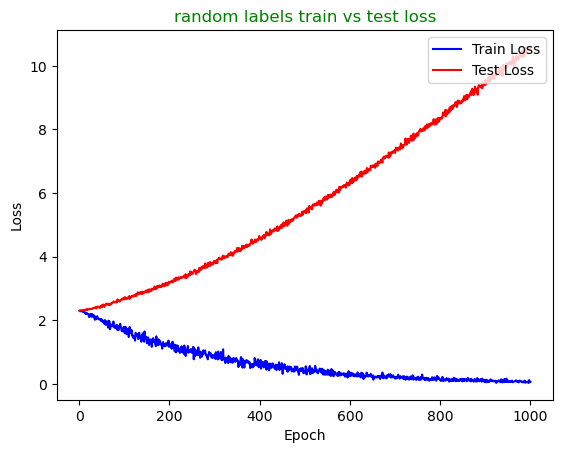

In [12]:
def test(model, epoch, test_loader):
    test_load = test_loader
    model.eval()
    n_correct = 0
    n_samples = 0
    testLoss = 0
    count = 0
    
    with torch.no_grad():
        for images, labels in test_load:
            images, labels = Variable(images),Variable(labels)
    
            prediction = model(images)
            testLoss += loss_func(prediction,labels).item()
           
            _,predicted = torch.max(prediction.data, 1)
            n_samples += labels.size(0)
            count += 1
            n_correct += (predicted == labels).sum().item()
    
        Test_loss = testLoss/count
        netTest_acc1 = 100.0 * n_correct / n_samples
        print(f'Accuracy of the network on the test images: {netTest_acc1}% & Test Loss: {Test_loss}')
    return netTest_acc1, Test_loss

#torch.manual_seed(1)

rmnist = RMNIST()
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(rmnist.parameters(), lr=0.0001)

a=[]
for i in rmnist.parameters():
    a.append(torch.numel(i))
print('Total no of parameters in Model 1:', np.sum(a),)

train_loss_arr = []

test_loss_arr = []

epochArr = []
epochs = 1000
interval = 500
for epoch in range(1, epochs + 1):
    epochArr.append(epoch)
    loss, acc = train(rmnist, optimizer, epoch, train_loader, interval)
    train_loss_arr.append(loss.detach().numpy())
    testAcc,testloss = test(rmnist, epoch, test_loader)
    test_loss_arr.append(testloss)

    
#Plotting Train Vs Test Loss

plt.plot(epochArr,train_loss_arr,color="Blue")
plt.plot(epochArr,test_loss_arr,color="red")
plt.legend(['Train Loss','Test Loss'],loc="upper right")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("random labels train vs test loss",color = "green")

plt.show()


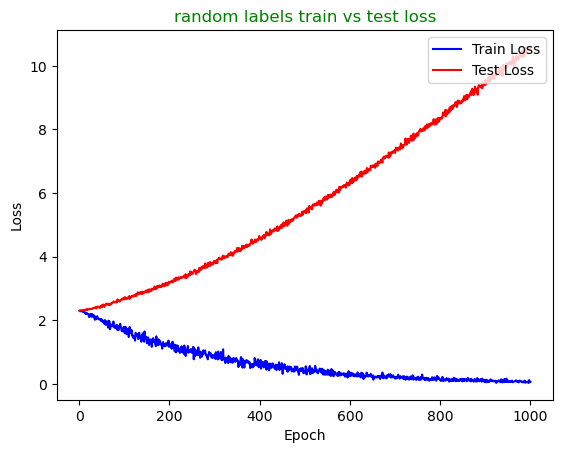

In [14]:
#Plotting Train Vs Test Loss

plt.plot(epochArr,train_loss_arr,color="Blue")
plt.plot(epochArr,test_loss_arr,color="red")
plt.legend(['Train Loss','Test Loss'],loc="upper right")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("random labels train vs test loss",color = "green")

plt.show()